In [1]:
import numpy as np
import pandas as pd

In [2]:
tco = pd.read_csv('C:/Users/karan/okla_colo_texas.csv')

In [3]:
tco.columns

Index(['Crash_ID', 'COUNTY_FIPS', 'COUNTY', 'INJURY_COUNT', 'INJURY_COUNT_SUM',
       'DARK-LIGHTED', 'DARK-NOT LIGHTED', 'DARK-UNKNOWN LIGHTING', 'DAWN',
       'DAYLIGHT', 'DUSK', 'OTHER_LIGHT', 'UNKNOWN_LIGHT', 'INATTENTION',
       'SPEEDING', 'CITY STREET', 'COUNTY ROAD', 'FARM TO MARKET',
       'INTERSTATE', 'OTHER ROADS', 'TOLL BRIDGES', 'TOLLWAY',
       'US & STATE HIGHWAY', 'ALCOHOL', 'ALCOHOL, DRUG', 'DRUG', 'MARIJUANA',
       'MEDICINAL', 'NO INTOXICATION', 'NO_INJURY', 'YES_INJURY', 'YEAR_CAT',
       'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'STATE'],
      dtype='object')

In [5]:
tco['INJURY_COUNT'].unique()

array([0, 1, 2, 4, 3, 7, 5], dtype=int64)

In [6]:
tco['YES_INJURY']

0        25.979248
1        25.147929
2        34.707147
3        38.840798
4        27.546118
           ...    
1180    100.000000
1181     66.666667
1182    100.000000
1183    100.000000
1184     91.666667
Name: YES_INJURY, Length: 1185, dtype: float64

In [7]:
import statsmodels.api as sm

In [8]:
data = tco[['INJURY_COUNT',
            'DARK-LIGHTED',
            'DARK-NOT LIGHTED',
            'DARK-UNKNOWN LIGHTING', 
            'DAWN', 'DAYLIGHT', 'DUSK', 
            'OTHER_LIGHT', 'UNKNOWN_LIGHT',
            'INATTENTION', 'SPEEDING', 'CITY STREET',
            'COUNTY ROAD', 'FARM TO MARKET', 'INTERSTATE',
            'OTHER ROADS', 'TOLL BRIDGES', 'TOLLWAY', 'US & STATE HIGHWAY',
            'ALCOHOL', 'ALCOHOL, DRUG', 'DRUG', 'MARIJUANA', 'MEDICINAL', 'NO INTOXICATION', 'NO_INJURY', 'YES_INJURY']]

In [9]:
correlation_mat = data.corr()

In [10]:
print(correlation_mat)

                       INJURY_COUNT  DARK-LIGHTED  DARK-NOT LIGHTED  \
INJURY_COUNT               1.000000     -0.010013          0.035480   
DARK-LIGHTED              -0.010013      1.000000         -0.668291   
DARK-NOT LIGHTED           0.035480     -0.668291          1.000000   
DARK-UNKNOWN LIGHTING     -0.063920      0.122359         -0.116976   
DAWN                      -0.042950     -0.142847          0.085333   
DAYLIGHT                  -0.022832      0.324334         -0.860048   
DUSK                       0.000557     -0.113740          0.012487   
OTHER_LIGHT                0.016292      0.005289         -0.018797   
UNKNOWN_LIGHT              0.031224     -0.005593          0.002333   
INATTENTION                0.111386     -0.157630          0.137416   
SPEEDING                  -0.071390     -0.105376          0.058111   
CITY STREET                0.022033      0.494150         -0.393294   
COUNTY ROAD                0.222022     -0.176502          0.184260   
FARM T

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

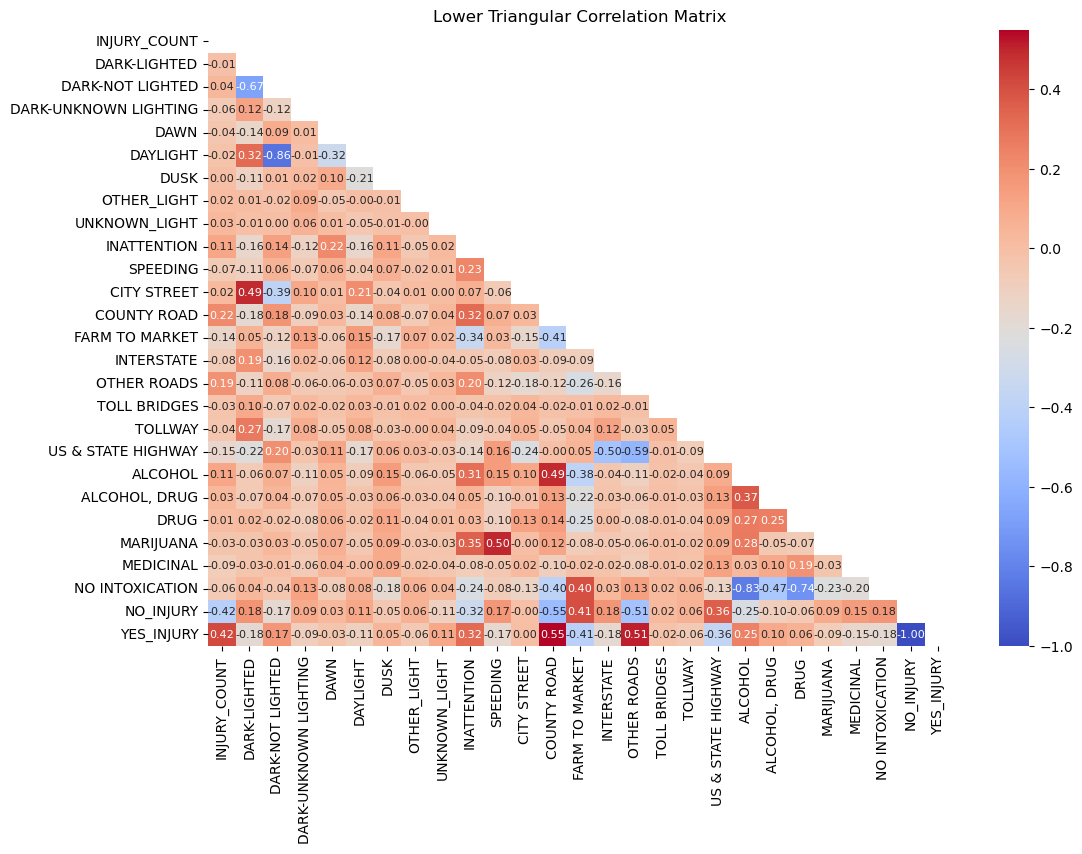

In [20]:
mask = np.triu(np.ones_like(correlation_mat, dtype=bool))

# Plotting the lower triangular part of the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_mat, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.title('Lower Triangular Correlation Matrix')
plt.show()

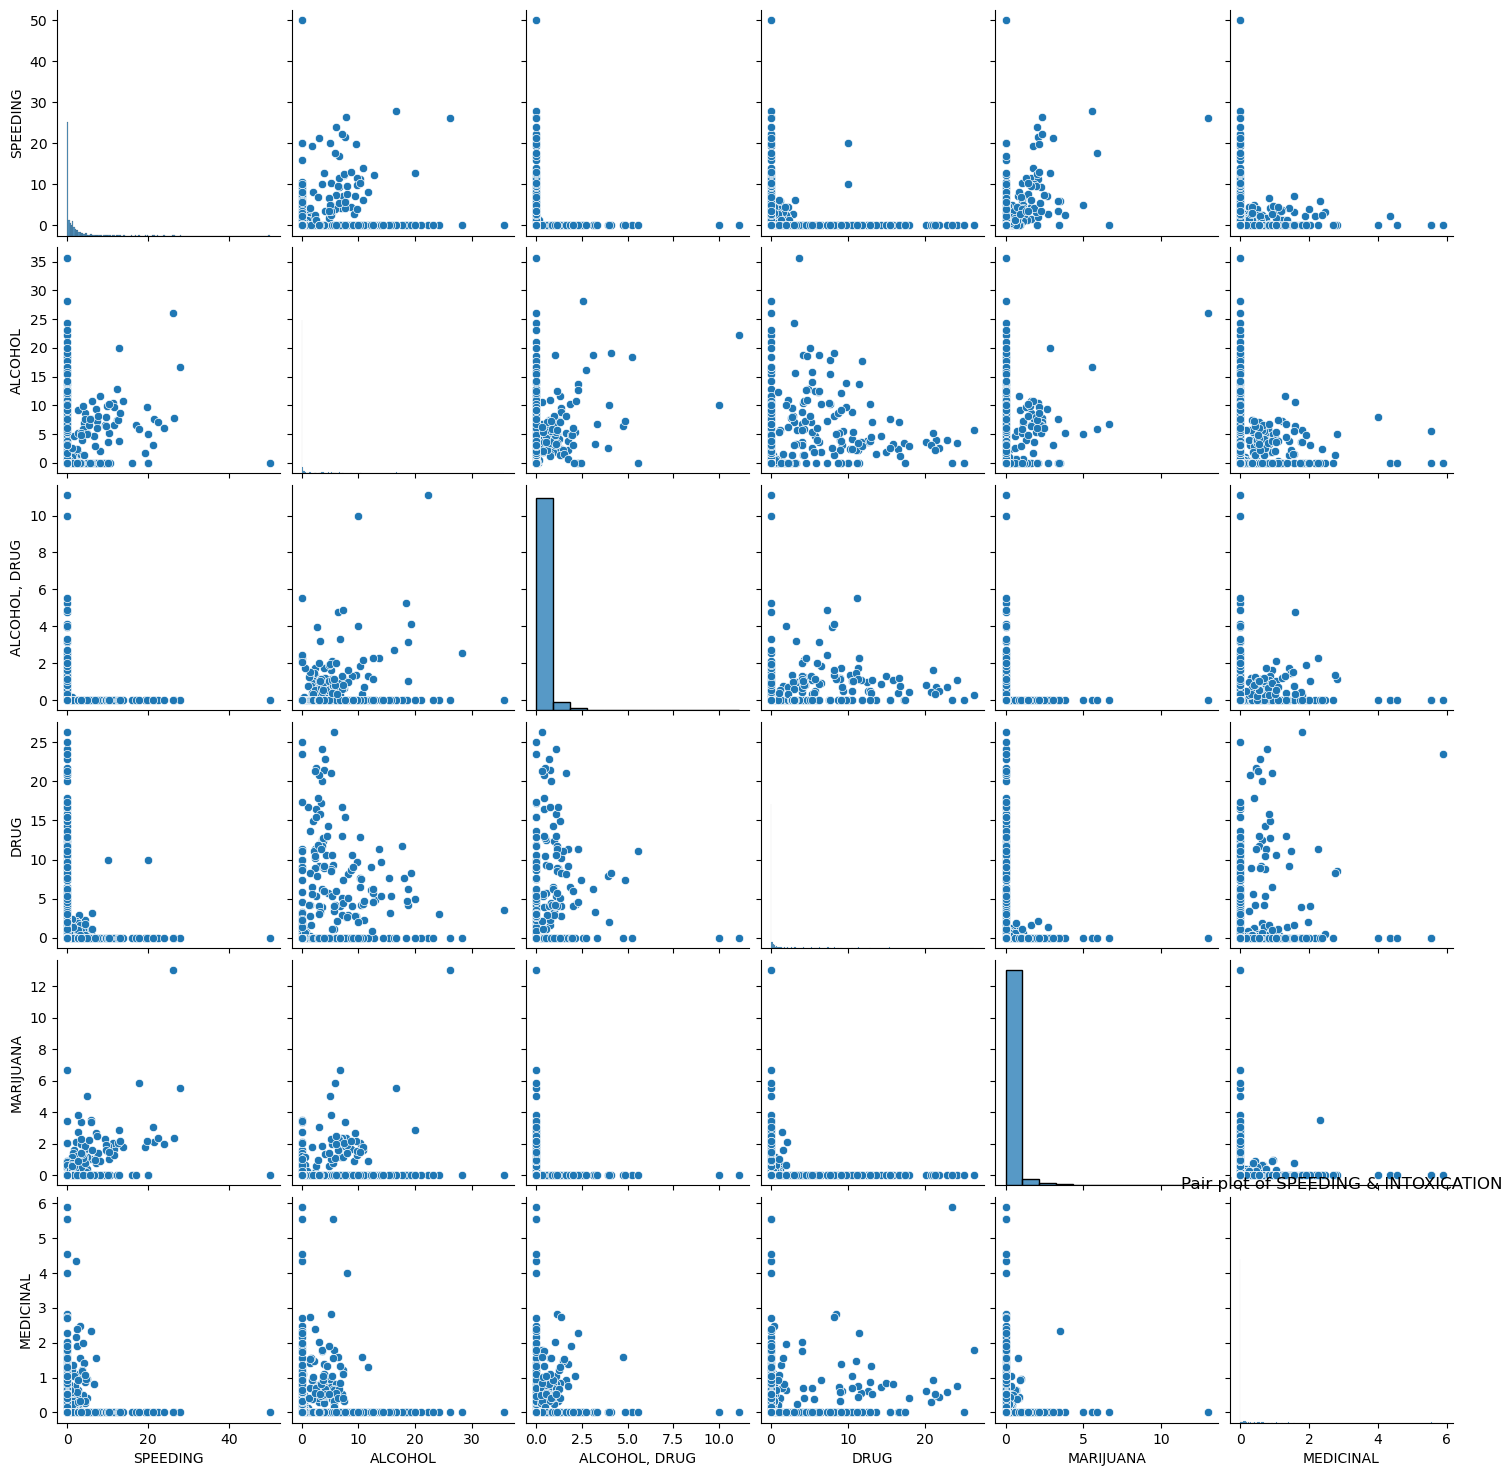

In [23]:
relevant_columns = ['SPEEDING', 'ALCOHOL', 'ALCOHOL, DRUG', 'DRUG', 'MARIJUANA', 'MEDICINAL']

sns.pairplot(tco[relevant_columns])
plt.title('Pair plot of SPEEDING & INTOXICATION')
plt.show()

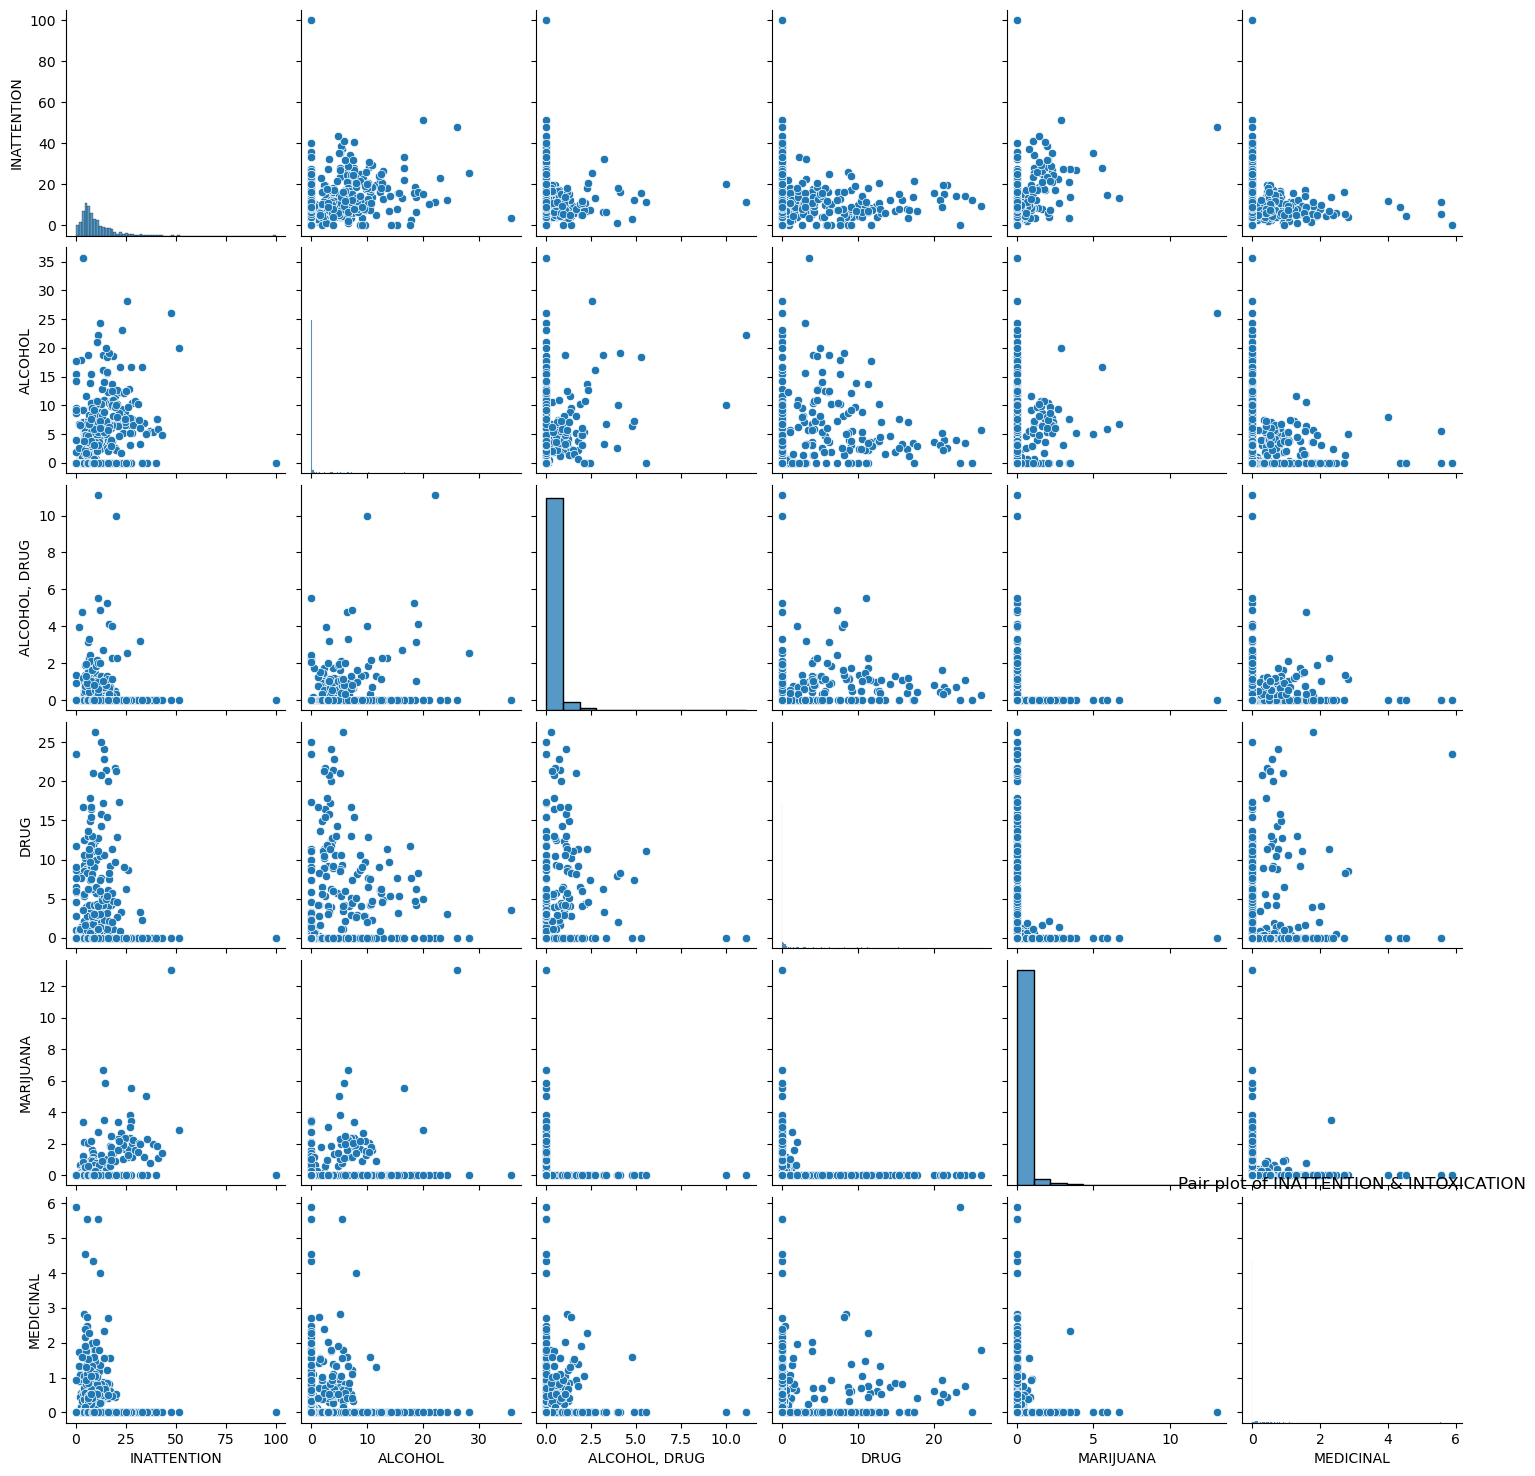

In [24]:
relevant_columns = ['INATTENTION', 'ALCOHOL', 'ALCOHOL, DRUG', 'DRUG', 'MARIJUANA', 'MEDICINAL']

sns.pairplot(tco[relevant_columns])
plt.title('Pair plot of INATTENTION & INTOXICATION')
plt.show()

In [27]:
relevant_columns = relevant_columns = ['SPEEDING', 'ALCOHOL', 'ALCOHOL, DRUG', 'DRUG', 'MARIJUANA', 'MEDICINAL']
speeding = tco[relevant_columns]
speed_cor_mat = speeding.corr()
print(speed_cor_mat)

               SPEEDING   ALCOHOL  ALCOHOL, DRUG      DRUG  MARIJUANA  \
SPEEDING       1.000000  0.151636      -0.099025 -0.102475   0.498481   
ALCOHOL        0.151636  1.000000       0.370390  0.268845   0.275146   
ALCOHOL, DRUG -0.099025  0.370390       1.000000  0.254788  -0.054693   
DRUG          -0.102475  0.268845       0.254788  1.000000  -0.070521   
MARIJUANA      0.498481  0.275146      -0.054693 -0.070521   1.000000   
MEDICINAL     -0.048340  0.025665       0.097160  0.187225  -0.034838   

               MEDICINAL  
SPEEDING       -0.048340  
ALCOHOL         0.025665  
ALCOHOL, DRUG   0.097160  
DRUG            0.187225  
MARIJUANA      -0.034838  
MEDICINAL       1.000000  


In [29]:
inattention = tco[['INATTENTION', 'ALCOHOL', 'ALCOHOL, DRUG', 'DRUG', 'MARIJUANA', 'MEDICINAL']]
inattention_cor_mat = inattention.corr()
print(inattention_cor_mat)

               INATTENTION   ALCOHOL  ALCOHOL, DRUG      DRUG  MARIJUANA  \
INATTENTION       1.000000  0.307868       0.047436  0.034178   0.352656   
ALCOHOL           0.307868  1.000000       0.370390  0.268845   0.275146   
ALCOHOL, DRUG     0.047436  0.370390       1.000000  0.254788  -0.054693   
DRUG              0.034178  0.268845       0.254788  1.000000  -0.070521   
MARIJUANA         0.352656  0.275146      -0.054693 -0.070521   1.000000   
MEDICINAL        -0.082078  0.025665       0.097160  0.187225  -0.034838   

               MEDICINAL  
INATTENTION    -0.082078  
ALCOHOL         0.025665  
ALCOHOL, DRUG   0.097160  
DRUG            0.187225  
MARIJUANA      -0.034838  
MEDICINAL       1.000000  


In [31]:
tco.columns

Index(['Crash_ID', 'COUNTY_FIPS', 'COUNTY', 'INJURY_COUNT', 'INJURY_COUNT_SUM',
       'DARK-LIGHTED', 'DARK-NOT LIGHTED', 'DARK-UNKNOWN LIGHTING', 'DAWN',
       'DAYLIGHT', 'DUSK', 'OTHER_LIGHT', 'UNKNOWN_LIGHT', 'INATTENTION',
       'SPEEDING', 'CITY STREET', 'COUNTY ROAD', 'FARM TO MARKET',
       'INTERSTATE', 'OTHER ROADS', 'TOLL BRIDGES', 'TOLLWAY',
       'US & STATE HIGHWAY', 'ALCOHOL', 'ALCOHOL, DRUG', 'DRUG', 'MARIJUANA',
       'MEDICINAL', 'NO INTOXICATION', 'NO_INJURY', 'YES_INJURY', 'YEAR_CAT',
       'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'STATE'],
      dtype='object')